# Neural Networks Implementation

### PreProcess Data

In [43]:
import PreProcessData as pre
import imp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

imp.reload(pre)
X_train, X_valid, y_train, y_valid = pre.PreProcessData()
y_valid = [0 if int(y) == 2 or int(y) == 3 else y for y in y_valid]
y_valid = np.array(y_valid)
y_valid = y_valid.reshape(-1,1)
# print(X_train.head())

### Class Construction

In [117]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.biases_input_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.biases_hidden_output = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        sig = self.sigmoid(x)
        return sig * (1 - sig)

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return np.where(x >= 0, 1, 0)

    def feedforward(self, X):
        # Input to hidden layer
        self.hidden_sum = np.dot(X, self.weights_input_hidden) + self.biases_input_hidden
        # self.hidden_activation = self.relu(self.hidden_sum)
        self.hidden_activation = self.sigmoid(self.hidden_sum)

        # Hidden to output layer
        self.output_sum = np.dot(self.hidden_activation, self.weights_hidden_output) + self.biases_hidden_output
        self.output_activation = self.sigmoid(self.output_sum)

        return self.output_activation

    def backward(self, X, y, output):
        # Output layer
        error_output = y - output
        # delta_output = error_output * self.relu_derivative(output)
        delta_output = error_output * self.sigmoid_derivative(output)

        # Hidden layer
        error_hidden = error_output.dot(self.weights_hidden_output.T)
        delta_hidden = error_hidden * self.sigmoid_derivative(self.hidden_activation)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_activation.T.dot(delta_output) * self.learning_rate
        self.biases_hidden_output += np.sum(delta_output, axis=0, keepdims=True) * self.learning_rate
        self.weights_input_hidden += X.T.dot(delta_hidden) * self.learning_rate
        self.biases_input_hidden += np.sum(delta_hidden, axis=0, keepdims=True) * self.learning_rate

    def train(self, X, y, epochs):
        y = y.reshape(-1,1)
        for epoch in range(epochs):
            # Forward pass
            output = self.feedforward(X)

            # Backpropagation
            self.backward(X, y, output)

            # Print loss every 100 epochs
            if (epoch + 1) % 100 == 0:
                loss = -(y * np.log(output) + (1 - y) * np.log(1 - output))
                loss = np.mean(loss)
                print(f'Epoch {epoch + 1}, Loss: {loss:.4f}')
                # print(f'Epoch {epoch + 1}, Loss: {loss}')

    def predict(self, X):
        return self.feedforward(X)

    def validate(self, y_pred, y_valid):
        num_of_correct_predictions = np.sum((y_pred >= 0.5) == y_valid)
        accuracy = num_of_correct_predictions / len(y_valid)
        return accuracy

    def plot(self, y_pred, y_valid):
        y_pred = [0 if y < 0.5 else 1 for y in y_pred]
        # Calculate confusion matrix
        cm = confusion_matrix(y_valid, y_pred)

        # Define labels for the confusion matrix
        labels = [['True Negative', 'False Positive'], ['False Negative', 'True Positive']]

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

        # Annotate cells with labels
        for i in range(2):
            for j in range(2):
                plt.text(j + 0.5, i + 0.3, labels[i][j], ha='center', va='center', color='red')

        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix with Labels')
        plt.show()

### 1 Neuron Model Construction

In [118]:
# Create and train the neural network
input_size = X_train.shape[1]
hidden_size = 1 # Number of neurons in the hidden layer
output_size = 1
learning_rate = 0.001
epochs = 1000

model1 = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
model1.train(np.array(X_train), np.array(y_train), epochs)
predictions1 = np.array(model1.predict(X_valid))
print("Model Accuracy", model1.validate(predictions1, y_valid))

Epoch 100, Loss: 0.5256
Epoch 200, Loss: 0.5202


/tmp/ipykernel_21012/1441769600.py:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 300, Loss: 0.5202
Epoch 400, Loss: 0.5198
Epoch 500, Loss: 0.5192
Epoch 600, Loss: 0.5190
Epoch 700, Loss: 0.5189
Epoch 800, Loss: 0.5190
Epoch 900, Loss: 0.5190
Epoch 1000, Loss: 0.5190
Model Accuracy 0.6272666218938885


We can see that nothing was learned here because the loss function value didn't change by much.

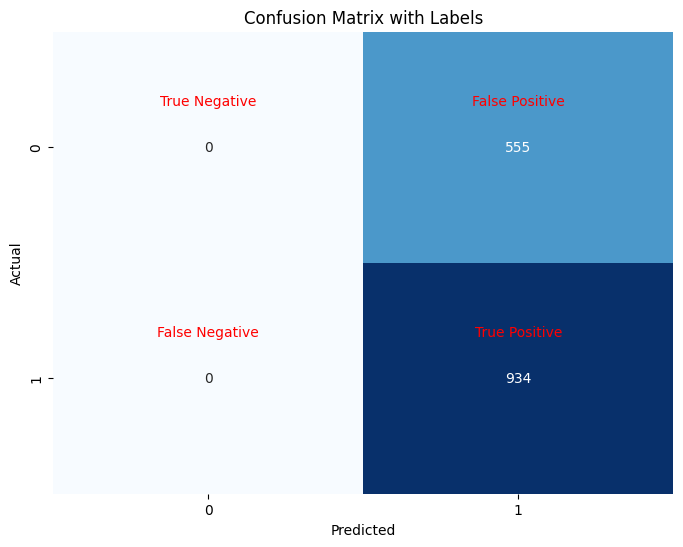

In [119]:
model1.plot(predictions1, y_valid)

### 4 Neuron Model Construction

In [120]:
# Create and train the neural network
input_size = X_train.shape[1]
hidden_size = 4 # Number of neurons in the hidden layer
output_size = 1
learning_rate = 0.001
epochs = 1000

model4 = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
model4.train(np.array(X_train), np.array(y_train), epochs)
predictions4 = np.array(model4.predict(X_valid))
print("Model Accuracy", model4.validate(predictions4, y_valid))

Epoch 100, Loss: 0.4858
Epoch 200, Loss: 0.4863
Epoch 300, Loss: 0.4919
Epoch 400, Loss: 0.4979
Epoch 500, Loss: 0.5017
Epoch 600, Loss: 0.5035
Epoch 700, Loss: 0.5045
Epoch 800, Loss: 0.5052
Epoch 900, Loss: 0.5057


/tmp/ipykernel_21012/1441769600.py:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 1000, Loss: 0.5061
Model Accuracy 0.6756212222968435


However when we add more neurons we can see that the Loss goes down and the model accuracy goes up (down in comparision to the previous model). It also seems like the overflow error requires more iterations to reach the more neurons you add.

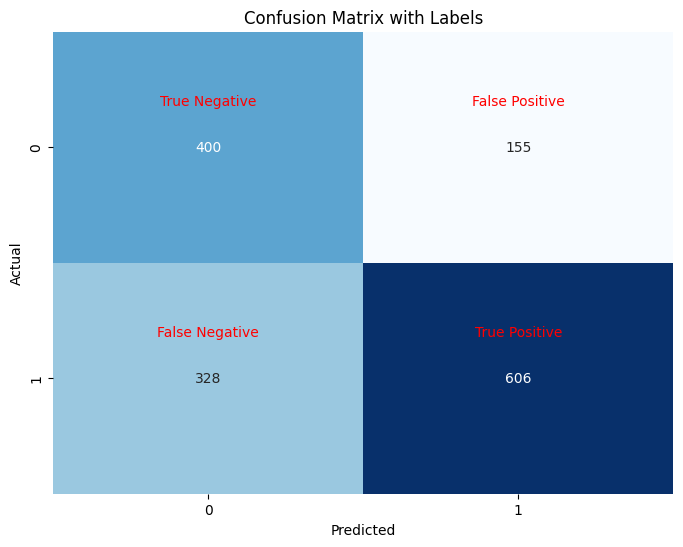

In [121]:
model4.plot(predictions4, y_valid)

### 16 Neuron Model Construction

In [122]:
# Create and train the neural network
input_size = X_train.shape[1]
hidden_size = 16 # Number of neurons in the hidden layer
output_size = 1
learning_rate = 0.001
epochs = 1000

model16 = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
model16.train(np.array(X_train), np.array(y_train), epochs)
predictions16 = np.array(model16.predict(X_valid))
print("Model Accuracy", model16.validate(predictions16, y_valid))

Epoch 100, Loss: 0.4721
Epoch 200, Loss: 0.4670
Epoch 300, Loss: 0.4633
Epoch 400, Loss: 0.4628
Epoch 500, Loss: 0.4645
Epoch 600, Loss: 0.4660
Epoch 700, Loss: 0.4671
Epoch 800, Loss: 0.4702
Epoch 900, Loss: 0.4733
Epoch 1000, Loss: 0.4753
Model Accuracy 0.7018132975151108


Same process of adding more neurons

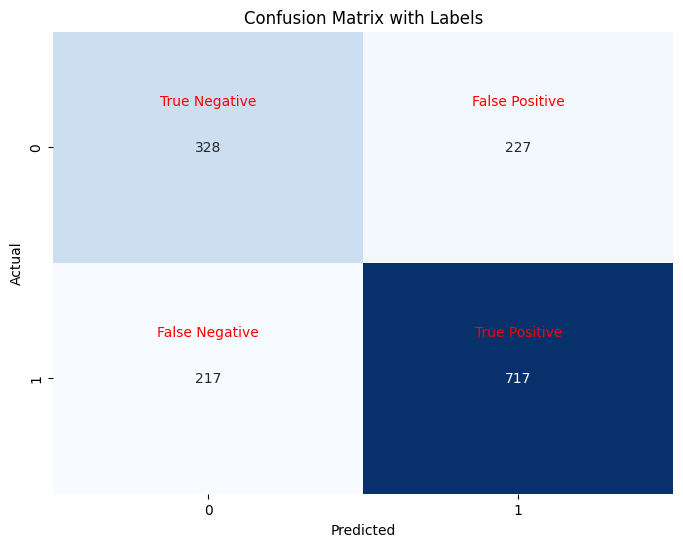

In [123]:
model16.plot(predictions16, y_valid)

### 32 Neuron Model Construction

In [124]:
# Create and train the neural network
input_size = X_train.shape[1]
hidden_size = 32 # Number of neurons in the hidden layer
output_size = 1
learning_rate = 0.001
epochs = 1000

model32 = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
model32.train(np.array(X_train), np.array(y_train), epochs)
predictions32 = np.array(model32.predict(X_valid))
print("Model Accuracy", model32.validate(predictions32, y_valid))

Epoch 100, Loss: 0.4643
Epoch 200, Loss: 0.4563
Epoch 300, Loss: 0.4546
Epoch 400, Loss: 0.4523
Epoch 500, Loss: 0.4504
Epoch 600, Loss: 0.4495
Epoch 700, Loss: 0.4493
Epoch 800, Loss: 0.4489
Epoch 900, Loss: 0.4482
Epoch 1000, Loss: 0.4483
Model Accuracy 0.7132303559435863


Same process of adding more neurons

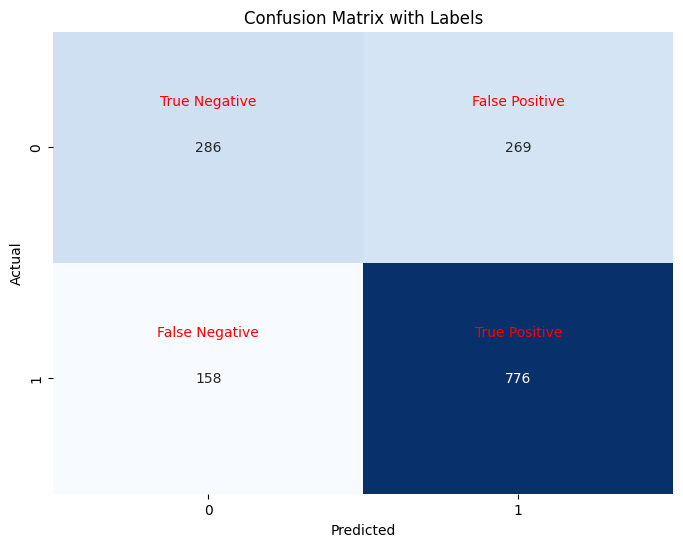

In [126]:
model32.plot(predictions32, y_valid)

### 0.002 Learning rate

In [127]:
# Create and train the neural network
input_size = X_train.shape[1]
hidden_size = 32 # Number of neurons in the hidden layer
output_size = 1
learning_rate = 0.002
epochs = 1000

model002 = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
model002.train(np.array(X_train), np.array(y_train), epochs)
predictions002 = np.array(model002.predict(X_valid))
print(model002.validate(predictions002, y_valid))

Epoch 100, Loss: 0.4590
Epoch 200, Loss: 0.4544
Epoch 300, Loss: 0.4620
Epoch 400, Loss: 0.4661
Epoch 500, Loss: 0.4659
Epoch 600, Loss: 0.4670
Epoch 700, Loss: 0.4699
Epoch 800, Loss: 0.4719
Epoch 900, Loss: 0.4728
Epoch 1000, Loss: 0.4732
0.6991269308260577


When we try and increase the learning rate, the 'bounce' happens very early (Epoche 200ish). Because there was a bounce, we know that the learning rate was too high. Also notice that the loss function is lower, but the model accuracy is lower too. This is not a trade off we want.

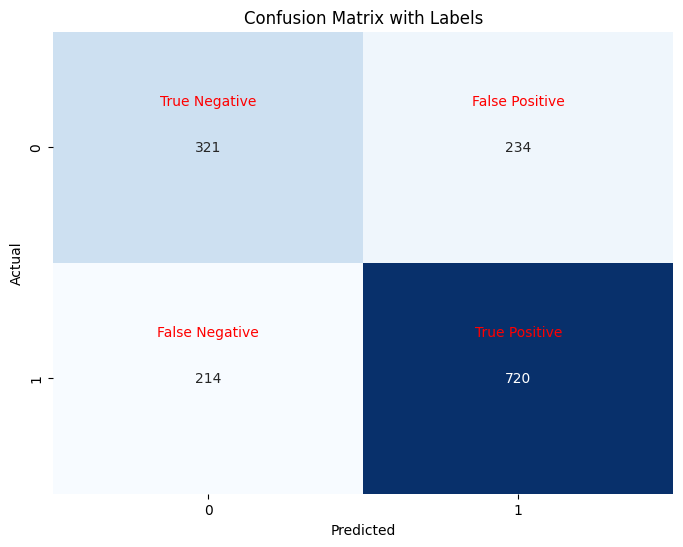

In [128]:
model002.plot(predictions002, y_valid)

### 0.0005 Learning rate

In [129]:
# Create and train the neural network
input_size = X_train.shape[1]
hidden_size = 32 # Number of neurons in the hidden layer
output_size = 1
learning_rate = 0.0005
epochs = 1000

model0005 = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
model0005.train(np.array(X_train), np.array(y_train), epochs)
predictions0005 = np.array(model0005.predict(X_valid))
print(model0005.validate(predictions0005, y_valid))

Epoch 100, Loss: 0.4880
Epoch 200, Loss: 0.4649
Epoch 300, Loss: 0.4574
Epoch 400, Loss: 0.4542
Epoch 500, Loss: 0.4524
Epoch 600, Loss: 0.4515
Epoch 700, Loss: 0.4506
Epoch 800, Loss: 0.4496
Epoch 900, Loss: 0.4488
Epoch 1000, Loss: 0.4482
0.7165883143049027


The learning rate is slower at 0.0005 compared to 0.002, but gives us a better prediction accuracy of 0.71. This because the 'bounce' didn't happen here like it did previously, which leads to smaller steps closer towards a lower risk.

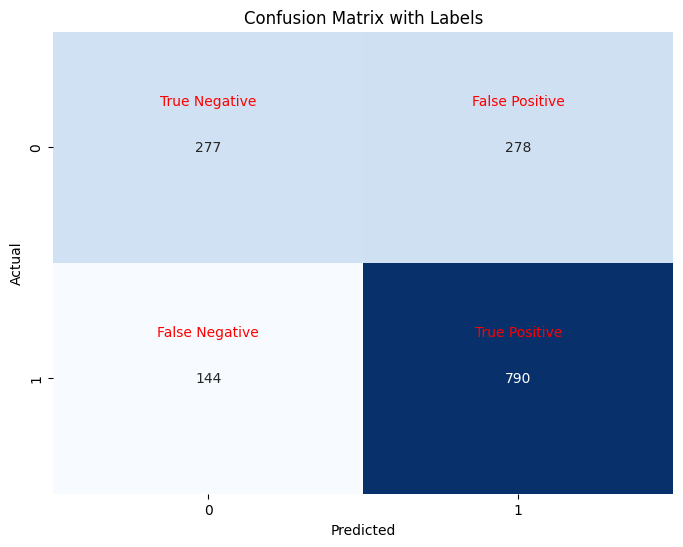

In [130]:
model0005.plot(predictions0005, y_valid)

### 1500 iterations, 0.0003 Learning Rate

In [134]:
# Create and train the neural network
input_size = X_train.shape[1]
hidden_size = 32 # Number of neurons in the hidden layer
output_size = 1
learning_rate = 0.0003
epochs = 1500

model1500 = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
model1500.train(np.array(X_train), np.array(y_train), epochs)
predictions1500 = np.array(model1500.predict(X_valid))
print(model1500.validate(predictions1500, y_valid))

Epoch 100, Loss: 0.5060
Epoch 200, Loss: 0.4808
Epoch 300, Loss: 0.4671
Epoch 400, Loss: 0.4595
Epoch 500, Loss: 0.4552
Epoch 600, Loss: 0.4529
Epoch 700, Loss: 0.4516
Epoch 800, Loss: 0.4504
Epoch 900, Loss: 0.4496
Epoch 1000, Loss: 0.4491
Epoch 1100, Loss: 0.4486
Epoch 1200, Loss: 0.4482
Epoch 1300, Loss: 0.4478
Epoch 1400, Loss: 0.4474
Epoch 1500, Loss: 0.4470
0.7118871725990598


The more iterations allows the low learning rate to reach near the max loss possible. However even though the loss of this model is less than the previous (lower empirical risk), the true risk is higher due to the model accuracy being 0.5% worse.

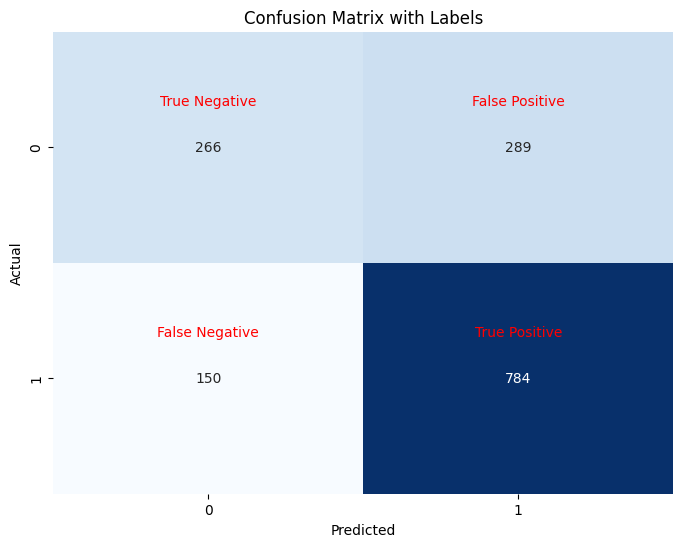

In [132]:
model1500.plot(predictions1500, y_valid)

### COMBINE EVERYTHING! 256 Neurons, 0.0002 Learning Rate, 4000 Iterations

In [135]:
# Create and train the neural network
input_size = X_train.shape[1]
hidden_size = 256 # Number of neurons in the hidden layer
output_size = 1
learning_rate = 0.0002
epochs = 4000

modelBIG = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
modelBIG.train(np.array(X_train), np.array(y_train), epochs)
predictionsBIG = np.array(modelBIG.predict(X_valid))
print(modelBIG.validate(predictionsBIG, y_valid))

Epoch 100, Loss: 0.8521
Epoch 200, Loss: 0.8421
Epoch 300, Loss: 0.8379
Epoch 400, Loss: 0.7975
Epoch 500, Loss: 0.7198
Epoch 600, Loss: 0.6241
Epoch 700, Loss: 0.5383
Epoch 800, Loss: 0.4802
Epoch 900, Loss: 0.5481
Epoch 1000, Loss: 0.5241
Epoch 1100, Loss: 0.5063
Epoch 1200, Loss: 0.4907
Epoch 1300, Loss: 0.4771
Epoch 1400, Loss: 0.4653
Epoch 1500, Loss: 0.4547
Epoch 1600, Loss: 0.4454
Epoch 1700, Loss: 0.4372
Epoch 1800, Loss: 0.4300
Epoch 1900, Loss: 0.4236
Epoch 2000, Loss: 0.4178
Epoch 2100, Loss: 0.4126
Epoch 2200, Loss: 0.4078
Epoch 2300, Loss: 0.4033
Epoch 2400, Loss: 0.3991
Epoch 2500, Loss: 0.3956
Epoch 2600, Loss: 0.3925
Epoch 2700, Loss: 0.3898
Epoch 2800, Loss: 0.3874
Epoch 2900, Loss: 0.3853
Epoch 3000, Loss: 0.3833
Epoch 3100, Loss: 0.3816
Epoch 3200, Loss: 0.3801
Epoch 3300, Loss: 0.3787
Epoch 3400, Loss: 0.3773
Epoch 3500, Loss: 0.3759
Epoch 3600, Loss: 0.3745
Epoch 3700, Loss: 0.3733
Epoch 3800, Loss: 0.3721
Epoch 3900, Loss: 0.3709
Epoch 4000, Loss: 0.3699
0.7219610

This model has a way lower loss at 0.3699 in comparision to before. Along with being more accurate which means the model has successfully lowered the empirical risk and the actual risk. Also some how we got the exact same model accuracy here as the LogisticRegression model, so my conclusion would be more neurons + more episiods would be we get a higher accuracy, but becomes decently negligable.

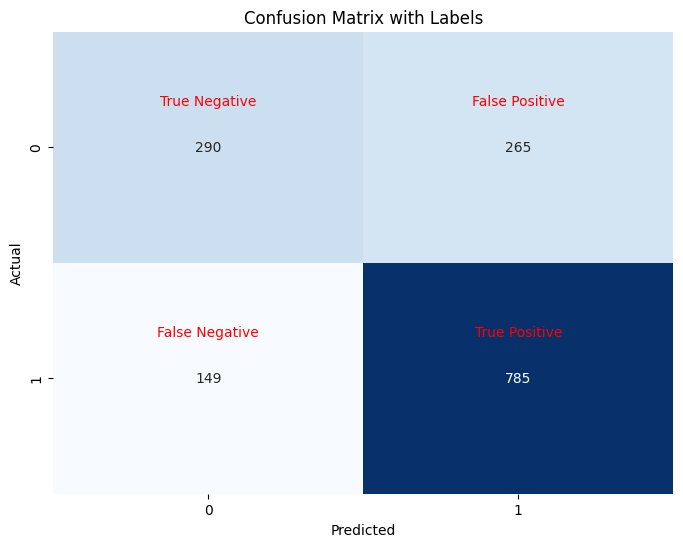

In [136]:
modelBIG.plot(predictionsBIG, y_valid)